In [70]:
import os
import uuid
import numpy as np 
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# This is used in order to show the plotted figures within this notebook
%matplotlib inline 
# This is used in order to show the tensorboard within this notebook             
#%load_ext tensorboard  
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#from google.colab import drive
#drive.mount("/content/gdrive", force_remount=True)
#!pip install kaggle
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/"
#!cd gdrive/MyDrive/paris-saclay-ai-competition
#!kaggle competitions download -c centralesupelec-summer-school-on-ai-2022
#!unzip centralesupelec-summer-school-on-ai-2022.zip
#!ls

In [71]:
train_df = pd.read_csv('./train.csv/train.csv', index_col=0)
test_df = pd.read_csv('./test.csv/test.csv', index_col=0)
train_preprocessed_df = pd.read_csv('./train.csv/train.csv', index_col=0)
test_preprocessed_df = pd.read_csv('./test.csv/test.csv', index_col=0)

train_preprocessed_df.head()


,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,"Mon, 6 Nov 2017 11:13:45 +0100",reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027,2
1,"Wed, 14 Feb 2018 11:00:16 -0000",edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961,1
2,"Wed, 6 Jul 2016 19:53:37 +0000",usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149,1
3,"Fri, 11 Oct 2019 11:25:40 +0200",granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296,1
4,"Tue, 07 Nov 2017 11:07:18 +0000 (UTC)",github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355,1


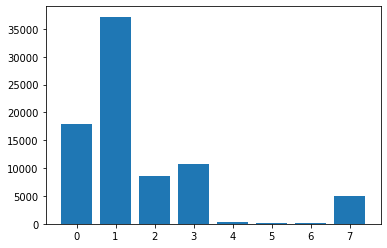

date                    0.0
org                     0.0
tld                     0.0
ccs                     0.0
bcced                   0.0
mail_type               0.0
images                  0.0
urls                    0.0
salutations             0.0
designation             0.0
chars_in_subject        0.0
chars_in_body           0.0
label                   0.0
is_country_tld          0.0
tld_orig_type           0.0
num_domains             0.0
date_has_weekday        0.0
date_has_parentheses    0.0
dtype: float64
date                    0.0
org                     0.0
tld                     0.0
ccs                     0.0
bcced                   0.0
mail_type               0.0
images                  0.0
urls                    0.0
salutations             0.0
designation             0.0
chars_in_subject        0.0
chars_in_body           0.0
is_country_tld          0.0
tld_orig_type           0.0
num_domains             0.0
date_has_weekday        0.0
date_has_parentheses    0.0
dtype

In [81]:
counter = Counter(train_preprocessed_df['label'])
plt.bar(counter.keys(), counter.values())
plt.show()

percent_missing = train_preprocessed_df.isnull().sum() * 100 / len(train_preprocessed_df)
print(percent_missing)
percent_missing = test_preprocessed_df.isnull().sum() * 100 / len(test_preprocessed_df)
print(percent_missing)


In [ ]:
train_preprocessed_df.describe()

In [73]:
#print(train_df['tld'].value_counts().to_string())
tlds = pd.read_csv("https://gist.githubusercontent.com/derlin/421d2bb55018a1538271227ff6b1299d/raw/3a131d47ca322a1d001f1f79333d924672194f36/country-codes-tlds.csv", encoding='utf8')
tlds = tlds[' tld']
tlds = [item[2:] for item in tlds.unique()]
original_tlds = ['com', 'net', 'org', 'edu', 'gov']
print(tlds)

train_preprocessed_df['tld'] = train_preprocessed_df['tld'].astype(str)

train_preprocessed_df['tld'] = train_preprocessed_df.apply(lambda row: ".".join(([str(row['org'])] if str(row['org']) else []) + row['tld'].lower().split(".")), axis=1)

train_preprocessed_df['is_country_tld'] = train_preprocessed_df.apply(lambda row: any(item in tlds for item in row['tld'].lower().split(".")), axis=1)
train_preprocessed_df['tld_orig_type'] = train_preprocessed_df.apply(lambda row: ".".join([elem for elem in row['tld'].lower().split(".") if elem in original_tlds]), axis=1)
train_preprocessed_df['num_domains'] = train_preprocessed_df.apply(lambda row: len(row['tld'].split(".")), axis=1)
train_preprocessed_df['tld_orig_type'].fillna('None', inplace=True)


test_preprocessed_df['tld'] = test_preprocessed_df['tld'].astype(str)

test_preprocessed_df['tld'] = test_preprocessed_df.apply(lambda row: ".".join(([str(row['org'])] if str(row['org']) else []) + row['tld'].lower().split(".")), axis=1)

test_preprocessed_df['is_country_tld'] = test_preprocessed_df.apply(lambda row: any(item in tlds for item in row['tld'].lower().split(".")), axis=1)
test_preprocessed_df['tld_orig_type'] = test_preprocessed_df.apply(lambda row: ".".join([elem for elem in row['tld'].lower().split(".") if elem in original_tlds]), axis=1)
test_preprocessed_df['num_domains'] = test_preprocessed_df.apply(lambda row: len(row['tld'].split(".")), axis=1)
test_preprocessed_df['tld_orig_type'].fillna('None', inplace=True)

train_preprocessed_df['tld'] = train_preprocessed_df.apply(lambda row: ".".join([elem for elem in row['tld'].lower().split(".") if elem not in tlds and elem not in original_tlds]), axis=1)

test_preprocessed_df['tld'] = test_preprocessed_df.apply(lambda row: ".".join([elem for elem in row['tld'].lower().split(".") if elem not in tlds and elem not in original_tlds]), axis=1)


['af', 'ax', 'al', 'dz', 'as', 'ad', 'ao', 'ai', 'aq', 'ag', 'ar', 'am', 'aw', 'ac', 'au', 'at', 'az', 'bs', 'bh', 'bd', 'bb', 'eus', 'by', 'be', 'bz', 'bj', 'bm', 'bt', 'bo', 'bq', 'an', 'nl', 'ba', 'bw', 'bv', 'br', 'io', 'vg', 'bn', 'bg', 'bf', 'mm', 'bi', 'kh', 'cm', 'ca', 'cv', 'cat', 'ky', 'cf', 'td', 'cl', 'cn', 'cx', 'cc', 'co', 'km', 'cd', 'cg', 'ck', 'cr', 'ci', 'hr', 'cu', 'cw', 'cy', 'cz', 'dk', 'dj', 'dm', 'do', 'tl', 'tp', 'ec', 'eg', 'sv', 'gq', 'er', 'ee', 'et', 'eu', 'fk', 'fo', 'fm', 'fj', 'fi', 'fr', 'gf', 'pf', 'tf', 'ga', 'gal', 'gm', 'ps', 'ge', 'de', 'gh', 'gi', 'gr', 'gl', 'gd', 'gp', 'gu', 'gt', 'gg', 'gn', 'gw', 'gy', 'ht', 'hm', 'hn', 'hk', 'hu', 'is', 'in', 'id', 'ir', 'iq', 'ie', 'im', 'il', 'it', 'jm', 'jp', 'je', 'jo', 'kz', 'ke', 'ki', 'kw', 'kg', 'la', 'lv', 'lb', 'ls', 'lr', 'ly', 'li', 'lt', 'lu', 'mo', 'mk', 'mg', 'mw', 'my', 'mv', 'ml', 'mt', 'mh', 'mq', 'mr', 'mu', 'yt', 'mx', 'md', 'mc', 'mn', 'me', 'ms', 'ma', 'mz', 'na', 'nr', 'np', 'nc', 'nz', 

In [74]:
train_x = train_preprocessed_df[['mail_type']]
train_y = train_preprocessed_df[['label']]

test_x = test_preprocessed_df[['mail_type']]

feat_enc2 = LabelEncoder()
feat_enc2.fit(np.vstack([train_x, test_x]))
train_tld_x_featurized = feat_enc2.transform(train_x)
test_tld_x_featurized = feat_enc2.transform(test_x)

train_preprocessed_df['mail_type'] = train_tld_x_featurized
test_preprocessed_df['mail_type'] = test_tld_x_featurized

train_x = train_preprocessed_df[['tld_orig_type']]
test_x = test_preprocessed_df[['tld_orig_type']]

feat_enc2 = LabelEncoder()
feat_enc2.fit(np.vstack([train_x, test_x]))
train_tld_x_featurized = feat_enc2.transform(train_x)
test_tld_x_featurized = feat_enc2.transform(test_x)

train_preprocessed_df['tld_orig_type'] = train_tld_x_featurized
test_preprocessed_df['tld_orig_type'] = test_tld_x_featurized

train_tld_x = train_preprocessed_df[['org']]
test_tld_x = test_preprocessed_df[['org']]

feat_enc2 = LabelEncoder()
feat_enc2.fit(np.vstack([train_tld_x, test_tld_x]))
train_tld_x_featurized = feat_enc2.transform(train_tld_x)
test_tld_x_featurized = feat_enc2.transform(test_tld_x)

train_preprocessed_df['org'] = train_tld_x_featurized
test_preprocessed_df['org'] = test_tld_x_featurized

train_tld_x = train_preprocessed_df[['tld']]
test_tld_x = test_preprocessed_df[['tld']]

feat_enc3 = LabelEncoder()
feat_enc3.fit(np.vstack([train_tld_x, test_tld_x]))
train_tld_x_featurized = feat_enc3.transform(train_tld_x)
test_tld_x_featurized = feat_enc3.transform(test_tld_x)

train_preprocessed_df['tld'] = train_tld_x_featurized
test_preprocessed_df['tld'] = test_tld_x_featurized

c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = colum

In [75]:
# Parse dates and put in unix format

from dateutil import parser
from datetime import datetime
import time

def to_unix(date):
  return int(time.mktime(date.timetuple()))

def strip_formatting(date_string):
  first_paren = date_string.find(" (")
  if first_paren != -1:
    return date_string[:first_paren]
  return date_string

def string_to_unix(date_string):
  date_time = parser.parse(strip_formatting(date_string))
  return to_unix(date_time)

def datetime_obj(date_string):
  unix_time = string_to_unix(date_string)
  return datetime.fromtimestamp(unix_time)

def has_weekday(date_string):
  return date_string[0].isalpha()

def has_parentheses(date_string):
  return date_string.find("(") != -1

# train_df['date'][382] has parentheses
# train_df['date][924] has no weekday

# add new columns to data
train_preprocessed_df['date_has_weekday'] = train_preprocessed_df.apply(lambda row: has_weekday(row['date']), axis=1)
train_preprocessed_df['date_has_parentheses'] = train_preprocessed_df.apply(lambda row: has_parentheses(row['date']), axis=1)
test_preprocessed_df['date_has_weekday'] = test_preprocessed_df.apply(lambda row: has_weekday(row['date']), axis=1)
test_preprocessed_df['date_has_parentheses'] = test_preprocessed_df.apply(lambda row: has_parentheses(row['date']), axis=1)
# make date unix style
train_preprocessed_df['date'] = train_preprocessed_df.apply(lambda row: pd.Period(datetime_obj(row['date']), freq='H').day_of_year, axis=1)
test_preprocessed_df['date'] = test_preprocessed_df.apply(lambda row: pd.Period(datetime_obj(row['date']), freq='H').day_of_year, axis=1)




In [ ]:
print(train_df['mail_type'].value_counts().to_string())

In [ ]:
cols = ['date',
 'ccs',
 'bcced',
 'images',
 'urls',
 'salutations',
 'designation',
 'chars_in_subject',
 'chars_in_body',
 'num_domains']
for col in cols:
    print(col)
    max_train = max(train_preprocessed_df[col])
    max_test = max(test_preprocessed_df[col])
    max_val = max(max_train, max_test)
    train_preprocessed_df[col] = train_preprocessed_df.apply(lambda row: float(row[col])/max_val, axis=1)
    test_df[col] = test_preprocessed_df.apply(lambda row: float(row[col])/max_val, axis=1)

In [ ]:
counter = Counter(train_preprocessed_df['tld_orig_type'])
plt.bar(counter.keys(), counter.values())
plt.show()

counter = Counter(train_preprocessed_df['label'])
plt.bar(counter.keys(), counter.values())
plt.show()

train_preprocessed_df.head()

In [76]:
from sklearn.impute import KNNImputer

removed_columns = ['label']
input_cols = [x for x in train_preprocessed_df.columns.values.tolist() if x not in removed_columns]

imputer = KNNImputer(n_neighbors=2, weights='distance')
imputer.fit(train_preprocessed_df[input_cols])
train_preprocessed_df[input_cols] = imputer.transform(train_preprocessed_df[input_cols])
test_preprocessed_df[input_cols] = imputer.transform(test_preprocessed_df[input_cols])
print(train_preprocessed_df.head())
print(test_preprocessed_df.head())
train_preprocessed_df.head()

    date     org     tld  ccs  bcced  mail_type  images   urls  salutations  \
0  310.0   803.0   904.0  0.0    0.0        4.0    35.0  120.0          0.0   
1   45.0   317.0   337.0  0.0    0.0        4.0     1.0    7.0          0.0   
2  188.0  1001.0  1106.0  0.0    0.0       11.0     4.0   17.0          0.0   
3  284.0   440.0   491.0  0.0    0.0        5.0     0.0    0.0          0.0   
4  311.0   421.0   470.0  1.0    0.0        4.0     2.0   11.0          0.0   

   designation  chars_in_subject  chars_in_body  label  is_country_tld  \
0          0.0              49.0        80027.0      2             1.0   
1          0.0             107.0         2961.0      1             0.0   
2          0.0              35.0        25149.0      1             0.0   
3          0.0              15.0       635296.0      1             1.0   
4          0.0              49.0         2355.0      1             0.0   

   tld_orig_type  num_domains  date_has_weekday  date_has_parentheses  
0       

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label,is_country_tld,tld_orig_type,num_domains,date_has_weekday,date_has_parentheses
0,310.0,803.0,904.0,0.0,0.0,4.0,35.0,120.0,0.0,0.0,49.0,80027.0,2,1.0,0.0,3.0,1.0,0.0
1,45.0,317.0,337.0,0.0,0.0,4.0,1.0,7.0,0.0,0.0,107.0,2961.0,1,0.0,1.0,3.0,1.0,0.0
2,188.0,1001.0,1106.0,0.0,0.0,11.0,4.0,17.0,0.0,0.0,35.0,25149.0,1,0.0,1.0,2.0,1.0,0.0
3,284.0,440.0,491.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,15.0,635296.0,1,1.0,0.0,2.0,1.0,0.0
4,311.0,421.0,470.0,1.0,0.0,4.0,2.0,11.0,0.0,0.0,49.0,2355.0,1,0.0,1.0,2.0,1.0,1.0


In [77]:
from math import ceil
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
# These columns will be used as the inputs of the models

print(input_cols)
# The output columns are the genres
output_col = 'label'

# Averages to calculate for precision, recall, and f1-score
averages = [None, "macro", "weighted", "micro", "samples"]

['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls', 'salutations', 'designation', 'chars_in_subject', 'chars_in_body', 'is_country_tld', 'tld_orig_type', 'num_domains', 'date_has_weekday', 'date_has_parentheses']


In [82]:
final_train_df = train_preprocessed_df.copy()
test_final_df = test_preprocessed_df.copy()

final_train_df.dropna(inplace=True)
test_final_df.dropna(inplace=True)

final_train_labels = final_train_df.pop('label')

In [ ]:
from imblearn.combine import SMOTETomek

oversample = SMOTETomek()
final_train_features, final_train_labels = oversample.fit_resample(final_train_df, final_train_labels)

In [88]:
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

level0 = list()
level0.append(('lr', LogisticRegression() ))
level0.append(('rf', DecisionTreeClassifier()))
level0.append(('xgb', XGBClassifier()))
level0.append(('lgbm', LGBMClassifier()))

level1 = CatBoostClassifier()
clf = StackingClassifier(estimators=level0, final_estimator=level1, cv=4)

clf.fit(final_train_df, final_train_labels)
pred_y = clf.predict(test_final_df)

pred_df = pd.DataFrame(pred_y, columns=['label'])
pred_df.to_csv("oversample_weights_randomforest.csv", index=True, index_label='Id')

c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Learning rate set to 0.098953
0:	learn: 1.7677944	total: 192ms	remaining: 3m 11s
1:	learn: 1.5738802	total: 248ms	remaining: 2m 3s
2:	learn: 1.4348874	total: 304ms	remaining: 1m 41s
3:	learn: 1.3231970	total: 360ms	remaining: 1m 29s
4:	learn: 1.2372385	total: 429ms	remaining: 1m 25s
5:	learn: 1.1658835	total: 496ms	remaining: 1m 22s
6:	learn: 1.1069335	total: 563ms	remaining: 1m 19s
7:	learn: 1.0557870	total: 633ms	remaining: 1m 18s
8:	learn: 1.0113870	total: 701ms	remaining: 1m 17s
9:	learn: 0.9743948	total: 780ms	remaining: 1m 17s
10:	learn: 0.9422660	total: 861ms	remaining: 1m 17s
11:	learn: 0.9129630	total: 928ms	remaining: 1m 16s
12:	learn: 0.8879854	total: 998ms	remaining: 1m 15s
13:	learn: 0.8663254	total: 1.06s	remaining: 1m 14s
14:	learn: 0.8467729	total: 1.13s	remaining: 1m 14s
15:	learn: 0.8297805	total: 1.19s	remaining: 1m 13s
16:	learn: 0.8140588	total: 1.25s	remaining: 1m 12s
17:	learn: 0.7979663	total: 1.3s	remaining: 1m 11s
18:	learn: 0.7866957	total: 1.36s	remaining: 1

c:\Python39\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

counter = Counter(pred_df['label'])
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
def evaluate_model(model, testing_inputs, testing_classes, output_cols, sample_weight=None):
    """
    This helper function prints the report and evaluation metrics for the model.
    """
    predictions = model.predict(testing_inputs)

    print("="*70)
    print(f"Evaluation metrics for {model.__class__.__name__}")
    print("="*70)

    score = model.score(testing_inputs, testing_classes) 
    print(f"{model.__class__.__name__}'s default score metric: {score}")


    print("Classification report")
    print(
        classification_report(testing_classes, predictions, sample_weight=sample_weight, digits=4, zero_division=1)
    )

    accuracy = accuracy_score(testing_classes, predictions, sample_weight=sample_weight)
    print(f"Accuracy: {accuracy:.4f}")

    f1 = f1_score(testing_classes, predictions, sample_weight=sample_weight, average='weighted')
    print(f"F1-Score: {f1:.4f}")

    cm = confusion_matrix(testing_classes, predictions, sample_weight=sample_weight)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()
    print("="*70)


In [ ]:

def train_and_evaluate(input_cols, output_cols, model, params, n_iter=None, sample_weight=None, random_state=42, scoring='accuracy', tuning=True):
    """
    This function trains the model and prints the evaluation metrics, as well as the confusion matrices, and learning and scalability plots.
    """
    inputs = train_preprocessed_df[input_cols].values
    classes = train_preprocessed_df[output_cols].values
    
    """scaler = StandardScaler()
    X_train = scaler.fit_transform(train_preprocessed_df[input_cols])
    X_test = scaler.fit_transform(test_preprocessed_df[output_cols])
    oversample = SMOTETomek(random_state=random_state)
    inputs, classes = oversample.fit_resample(inputs, classes)
    counter = Counter(classes)
    plt.bar(counter.keys(), counter.values())
    plt.show()"""
    

    
    (training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(inputs, classes, test_size=0.2, random_state=random_state)
    if tuning:
        if n_iter == None:
            clf = GridSearchCV(model, params, n_jobs=-1, cv=5)
        else:
            clf = RandomizedSearchCV(
                model, params, n_iter=n_iter, scoring=scoring,
                n_jobs=-1, cv=5, random_state=random_state)
    else:
        clf = model
    
    clf.fit(training_inputs, training_classes)

    if tuning:
        print(f"Best params for {model.__class__.__name__}: {clf.best_params_}")
        
    evaluate_model(clf, testing_inputs, testing_classes, output_cols, sample_weight=sample_weight)
    
    return clf

In [ ]:
def use_model(model, params = {}, scoring='accuracy', n_iter=50, random_state=42, tuning=True):
    """
    A more convenient wrapper around train_and_evaluate, albeit less general.
    """
    return train_and_evaluate(input_cols, output_col, model, params, n_iter=n_iter, random_state=random_state, scoring=scoring, tuning=tuning)

In [ ]:
train_preprocessed_df[:1000]

Best params for KNeighborsClassifier: {'weights': 'uniform', 'n_neighbors': 29}
Evaluation metrics for RandomizedSearchCV
RandomizedSearchCV's default score metric: 0.47324769269144423
Classification report
              precision    recall  f1-score   support

           0     0.4741    0.3582    0.4080      3680
           1     0.4829    0.6779    0.5640      7429
           2     0.3676    0.1414    0.2042      1719
           3     0.4739    0.3352    0.3927      2109
           4     1.0000    0.0000    0.0000        50
           5     0.5000    0.0385    0.0714        26
           6     1.0000    0.0000    0.0000        31
           7     0.4226    0.2863    0.3413       992

    accuracy                         0.4732     16036
   macro avg     0.5901    0.2297    0.2477     16036
weighted avg     0.4662    0.4732    0.4497     16036

Accuracy: 0.4732
F1-Score: 0.4497


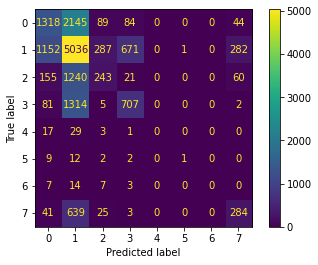

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [78]:
use_model(
    KNeighborsClassifier(), 
    {
        "n_neighbors": list(range(1,31)),
        "weights": ['uniform', 'distance'],
    }
)

In [ ]:
pred_y = clf.predict(test_preprocessed_df[input_cols].values)

pred_df = pd.DataFrame(pred_y, columns=['label'])
pred_df.to_csv("random_forest.csv", index=True, index_label='Id')

In [ ]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
file = tf.keras.utils
raw_df = pd.read_csv('./train.csv/train.csv', index_col=0)
final_test_df = pd.read_csv('./test.csv/test.csv', index_col=0)
raw_df.head()


In [ ]:
cleaned_df = raw_df.copy()

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['log_images'] = np.log(cleaned_df.pop('images')+eps)
cleaned_df['log_urls'] = np.log(cleaned_df.pop('urls')+eps)
cleaned_df['log_chars_in_body'] = np.log(cleaned_df.pop('chars_in_body')+eps)

# Parse dates and put in unix format

from dateutil import parser
from datetime import datetime
import time

def to_unix(date):
  return int(time.mktime(date.timetuple()))

def strip_formatting(date_string):
  first_paren = date_string.find(" (")
  if first_paren != -1:
    return date_string[:first_paren]
  return date_string

def string_to_unix(date_string):
  date_time = parser.parse(strip_formatting(date_string))
  return to_unix(date_time)

def datetime_obj(date_string):
  unix_time = string_to_unix(date_string)
  return datetime.fromtimestamp(unix_time)

def has_weekday(date_string):
  return date_string[0].isalpha()

def has_parentheses(date_string):
  return date_string.find("(") != -1

# train_df['date'][382] has parentheses
# train_df['date][924] has no weekday

# add new columns to data
cleaned_df['date_has_weekday'] = cleaned_df.apply(lambda row: has_weekday(row['date']), axis=1)
cleaned_df['date_has_parentheses'] = cleaned_df.apply(lambda row: has_parentheses(row['date']), axis=1)
final_test_df['date_has_weekday'] = final_test_df.apply(lambda row: has_weekday(row['date']), axis=1)
final_test_df['date_has_parentheses'] = final_test_df.apply(lambda row: has_parentheses(row['date']), axis=1)
# make date unix style
cleaned_df['date'] = cleaned_df.apply(lambda row: pd.Period(datetime_obj(row['date']), freq='H').day_of_year, axis=1)
final_test_df['date'] = final_test_df.apply(lambda row: pd.Period(datetime_obj(row['date']), freq='H').day_of_year, axis=1)


In [ ]:
#print(train_df['tld'].value_counts().to_string())
tlds = pd.read_csv("https://gist.githubusercontent.com/derlin/421d2bb55018a1538271227ff6b1299d/raw/3a131d47ca322a1d001f1f79333d924672194f36/country-codes-tlds.csv", encoding='utf8')
tlds = tlds[' tld']
tlds = [item[2:] for item in tlds.unique()]
original_tlds = ['com', 'net', 'org', 'edu', 'gov']
print(tlds)

cleaned_df['tld'] = cleaned_df['tld'].astype(str)

cleaned_df['tld'] = cleaned_df.apply(lambda row: ".".join(([str(row['org'])] if str(row['org']) else []) + row['tld'].lower().split(".")), axis=1)

cleaned_df['is_country_tld'] = cleaned_df.apply(lambda row: any(item in tlds for item in row['tld'].lower().split(".")), axis=1)
cleaned_df['tld_orig_type'] = cleaned_df.apply(lambda row: ".".join([elem for elem in row['tld'].lower().split(".") if elem in original_tlds]), axis=1)
cleaned_df['num_domains'] = cleaned_df.apply(lambda row: len(row['tld'].split(".")), axis=1)
cleaned_df['tld_orig_type'].fillna('None', inplace=True)


final_test_df['tld'] = final_test_df['tld'].astype(str)

final_test_df['tld'] = final_test_df.apply(lambda row: ".".join(([str(row['org'])] if str(row['org']) else []) + row['tld'].lower().split(".")), axis=1)

final_test_df['is_country_tld'] = final_test_df.apply(lambda row: any(item in tlds for item in row['tld'].lower().split(".")), axis=1)
final_test_df['tld_orig_type'] = final_test_df.apply(lambda row: ".".join([elem for elem in row['tld'].lower().split(".") if elem in original_tlds]), axis=1)
final_test_df['num_domains'] = final_test_df.apply(lambda row: len(row['tld'].split(".")), axis=1)
final_test_df['tld_orig_type'].fillna('None', inplace=True)

cleaned_df['tld'] = cleaned_df.apply(lambda row: ".".join([elem for elem in row['tld'].lower().split(".") if elem not in tlds and elem not in original_tlds]), axis=1)

final_test_df['tld'] = final_test_df.apply(lambda row: ".".join([elem for elem in row['tld'].lower().split(".") if elem not in tlds and elem not in original_tlds]), axis=1)


In [ ]:
train_x = cleaned_df[['mail_type']]
train_y = cleaned_df[['label']]

test_x = final_test_df[['mail_type']]

feat_enc2 = LabelEncoder()
feat_enc2.fit(np.vstack([train_x, test_x]))
train_tld_x_featurized = feat_enc2.transform(train_x)
test_tld_x_featurized = feat_enc2.transform(test_x)

cleaned_df['mail_type'] = train_tld_x_featurized
final_test_df['mail_type'] = test_tld_x_featurized

train_x = cleaned_df[['tld_orig_type']]
test_x = final_test_df[['tld_orig_type']]

feat_enc2 = LabelEncoder()
feat_enc2.fit(np.vstack([train_x, test_x]))
train_tld_x_featurized = feat_enc2.transform(train_x)
test_tld_x_featurized = feat_enc2.transform(test_x)

cleaned_df['tld_orig_type'] = train_tld_x_featurized
final_test_df['tld_orig_type'] = test_tld_x_featurized

train_tld_x = cleaned_df[['org']]
test_tld_x = final_test_df[['org']]

feat_enc2 = LabelEncoder()
feat_enc2.fit(np.vstack([train_tld_x, test_tld_x]))
train_tld_x_featurized = feat_enc2.transform(train_tld_x)
test_tld_x_featurized = feat_enc2.transform(test_tld_x)

cleaned_df['org'] = train_tld_x_featurized
final_test_df['org'] = test_tld_x_featurized

train_tld_x = cleaned_df[['tld']]
test_tld_x = final_test_df[['tld']]

feat_enc3 = LabelEncoder()
feat_enc3.fit(np.vstack([train_tld_x, test_tld_x]))
train_tld_x_featurized = feat_enc3.transform(train_tld_x)
test_tld_x_featurized = feat_enc3.transform(test_tld_x)

cleaned_df['tld'] = train_tld_x_featurized
final_test_df['tld'] = test_tld_x_featurized

In [ ]:
cleaned_df.dropna(inplace=True)

In [ ]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(cleaned_df, test_size=0.2)

from collections import Counter

counter = Counter(train_df['label'])
plt.bar(counter.keys(), counter.values())
plt.show()



In [ ]:
# Form np arrays of labels and features.
from keras.utils import np_utils
train_labels = np_utils.to_categorical(train_df.pop('label'))
val_labels = np_utils.to_categorical(val_df.pop('label'))
test_labels = np_utils.to_categorical(test_df.pop('label'))
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

train_features[0]

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


In [ ]:
final_train_df = cleaned_df.copy()
test_final_df = final_test_df.copy()

final_train_labels = np_utils.to_categorical(final_train_df.pop('label'))
final_train_features = np.array(final_train_df)
final_test_features = np.array(test_final_df)


In [ ]:
scaler = StandardScaler()
final_train_features = scaler.fit_transform(final_train_features)
final_test_features = scaler.transform(final_test_features)

final_train_features = np.clip(final_train_features, -5, 5)
final_test_features = np.clip(final_test_features, -5, 5)


In [ ]:


def make_model():
  input =  tf.keras.Input(shape=train_df.shape[1:])
  x = tf.keras.layers.Flatten()(input)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dense(64, activation='relu')(x)
  x = tf.keras.layers.Dense(32, activation='relu')(x)
  output = tf.keras.layers.Dense(8, activation='softmax')(x)
  model = tf.keras.models.Model(input,output)
  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss= tf.keras.losses.CategoricalCrossentropy(),
                metrics=[tf.keras.metrics.CategoricalAccuracy(),
                        tf.keras.metrics.FalseNegatives(),
                        tf.keras.metrics.AUC(name='prc', curve='PR')])

  return model

In [ ]:
model = make_model()
model.summary()
print(f'Train Features Shape: {train_features.shape} \nTrain Labels Shape: {train_labels.shape}')


In [ ]:
model.fit(x=train_features, y=train_labels, epochs=5, validation_data=(val_features, val_labels))

In [ ]:
model.evaluate(test_features, test_labels)

In [ ]:
model = make_model()
model.summary()
print(f'Train Features Shape: {train_features.shape} \nTrain Labels Shape: {train_labels.shape}')

In [ ]:
model.fit(x=final_train_features, y=final_train_labels, epochs=5)

In [ ]:
predictions = model.predict(final_test_features)
predictions = np.argmax(predictions, axis=1)
predictions

In [ ]:
counter = Counter(predictions)
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
pd.DataFrame(predictions, columns=['label']).to_csv('keras.csv')

In [ ]:
final_train_df = cleaned_df.copy()
test_final_df = final_test_df.copy()

final_train_labels = np_utils.to_categorical(final_train_df.pop('label'))
final_train_features = np.array(final_train_df)
final_test_features = np.array(test_final_df)

scaler = StandardScaler()
final_train_features = scaler.fit_transform(final_train_features)
final_test_features = scaler.transform(final_test_features)

final_train_features = np.clip(final_train_features, -5, 5)
final_test_features = np.clip(final_test_features, -5, 5)


In [ ]:
from imblearn.combine import SMOTETomek

oversample = SMOTETomek()
final_train_features, final_train_labels = oversample.fit_resample(final_train_features, final_train_labels)

In [ ]:
counter = Counter(np.argmax(final_train_labels, axis=1))
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
model = make_model()
model.summary()
print(f'Train Features Shape: {train_features.shape} \nTrain Labels Shape: {train_labels.shape}')

In [ ]:
predictions = model.predict(final_test_features)
predictions = np.argmax(predictions, axis=1)
predictions

In [ ]:
counter = Counter(predictions)
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
pd.DataFrame(predictions, columns=['label']).to_csv('keras_oversampling.csv')